In [3]:
# libraries
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

C:\Users\Cynthia\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
df=pd.read_csv(r"data\Diwali Sales Data.csv", encoding='latin')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB
None


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# checking for null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [5]:
# dropping missing columns.
df.drop(columns=["Status", "unnamed1"], inplace=True)

In [12]:
# checking for duplicate values
df.duplicated().sum()

0

In [13]:
df=df.drop_duplicates()

In [8]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.124300e+04,11243.000000,11243.000000,11243.000000,11231.000000
mean,1.003005e+06,35.422841,0.420261,2.488749,9454.084982
std,1.716141e+03,12.756369,0.493623,1.114960,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001494e+06,27.000000,0.000000,1.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


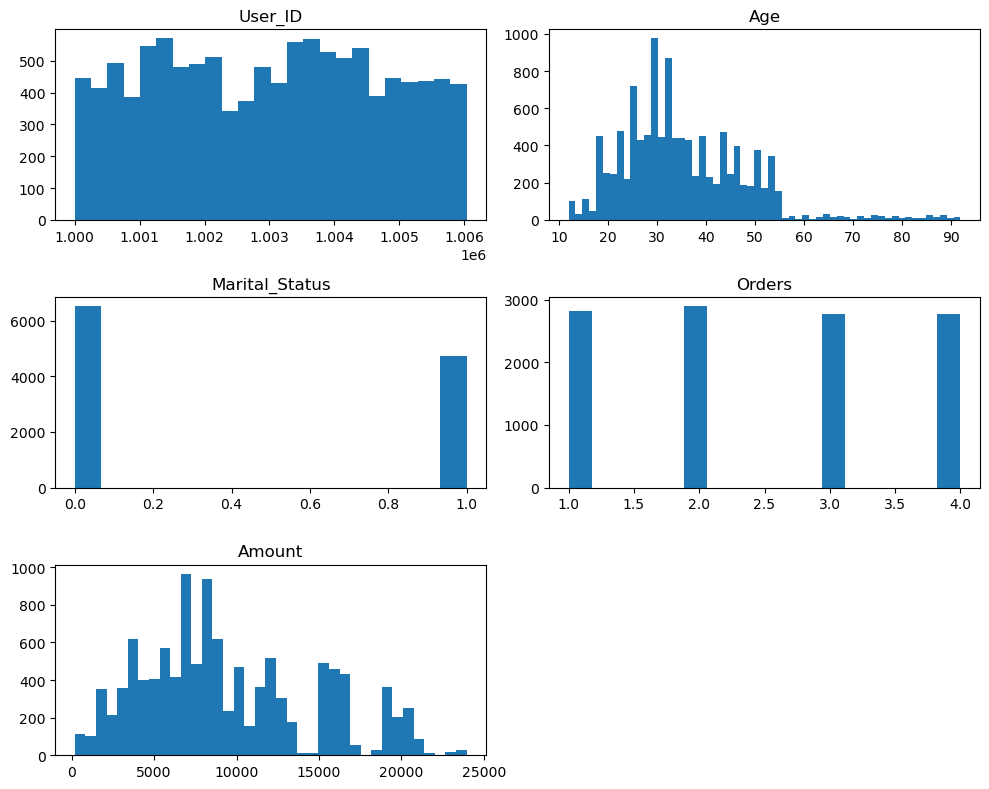

In [9]:
df.hist(bins='auto', grid= False, figsize=(10,8))
plt.tight_layout()

### Who buys the product?

<Axes: xlabel='Gender'>

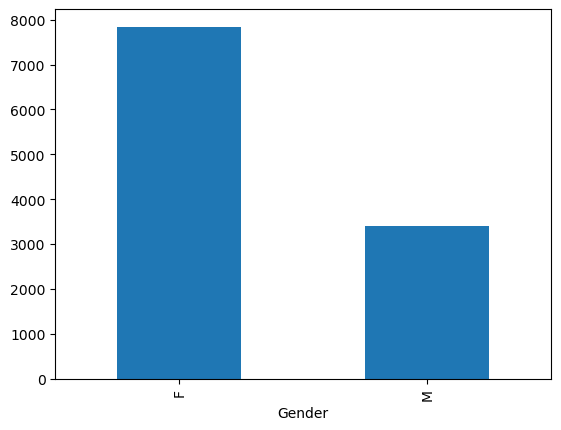

In [83]:
df.value_counts("Gender").plot(kind="bar")

In [9]:
df.groupby(["Age Group", "Gender"], as_index=False)["Amount"].mean().sort_values(by="Amount", ascending=False)

,Age Group,Gender,Amount
13,55+,M,10813.264516
11,51-55,M,10383.642599
6,36-45,F,9828.870399
10,51-55,F,9738.169982
8,46-50,F,9730.725830
4,26-35,F,9471.996005
7,36-45,M,9411.401418
1,0-17,M,9389.880597
3,18-25,M,9327.054007
5,26-35,M,9158.403302


<Axes: xlabel='Age Group', ylabel='count'>

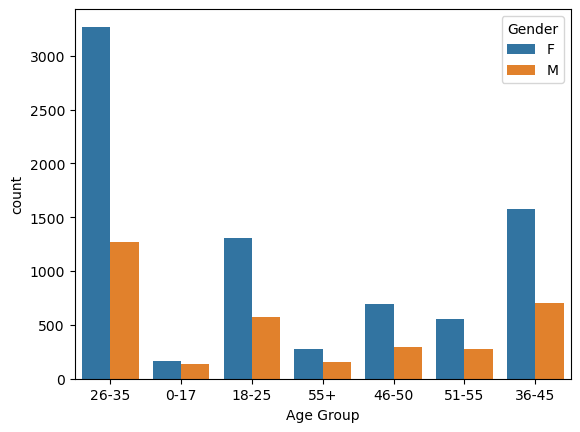

In [5]:
sns.countplot(data=df, x="Age Group", hue="Gender")


Most of the people who buys the product are female. Most of them are between the ages of 26 and 35, there is also a noticeable number of females who buys the product the most between the ages of 18 and 25 and also between 36 and 45. Most of the males who buys the product are between the ages of 36 and 45 and also between 18-25 years old.

### What is their marital Status?

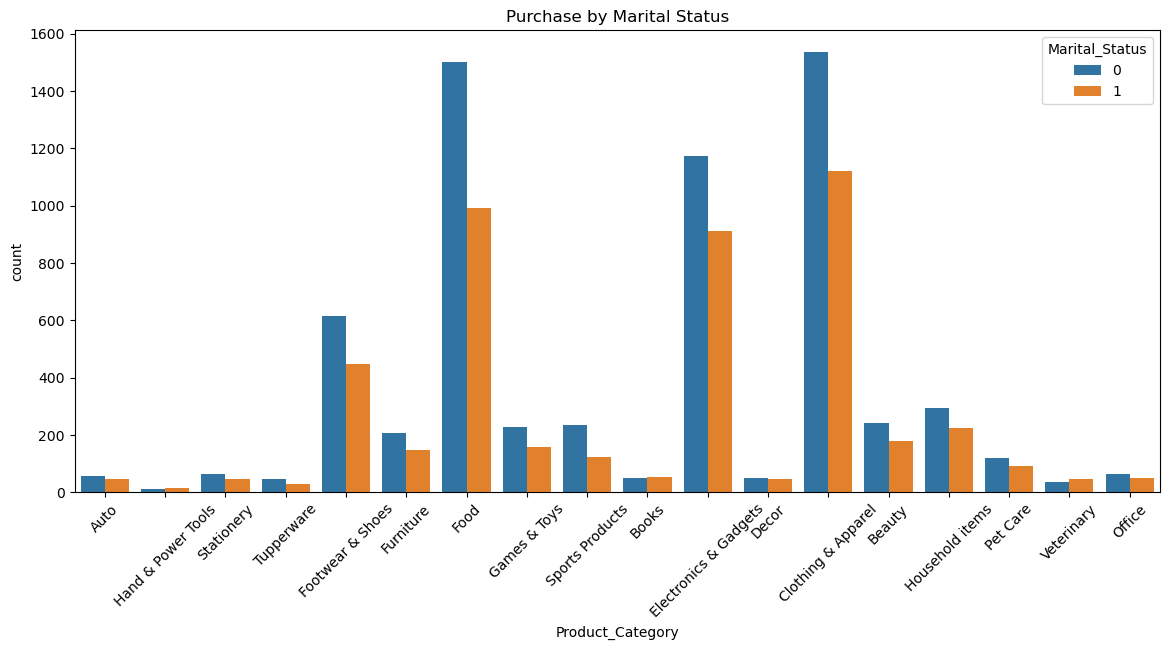

In [5]:
fig, ax=plt.subplots(figsize=(14,6))
pd.crosstab(df['Product_Category'], df["Marital_Status"])

sns.countplot(data=df, x='Product_Category', hue="Marital_Status", ax=ax)
plt.xticks(rotation=45)
plt.title("Purchase by Marital Status");

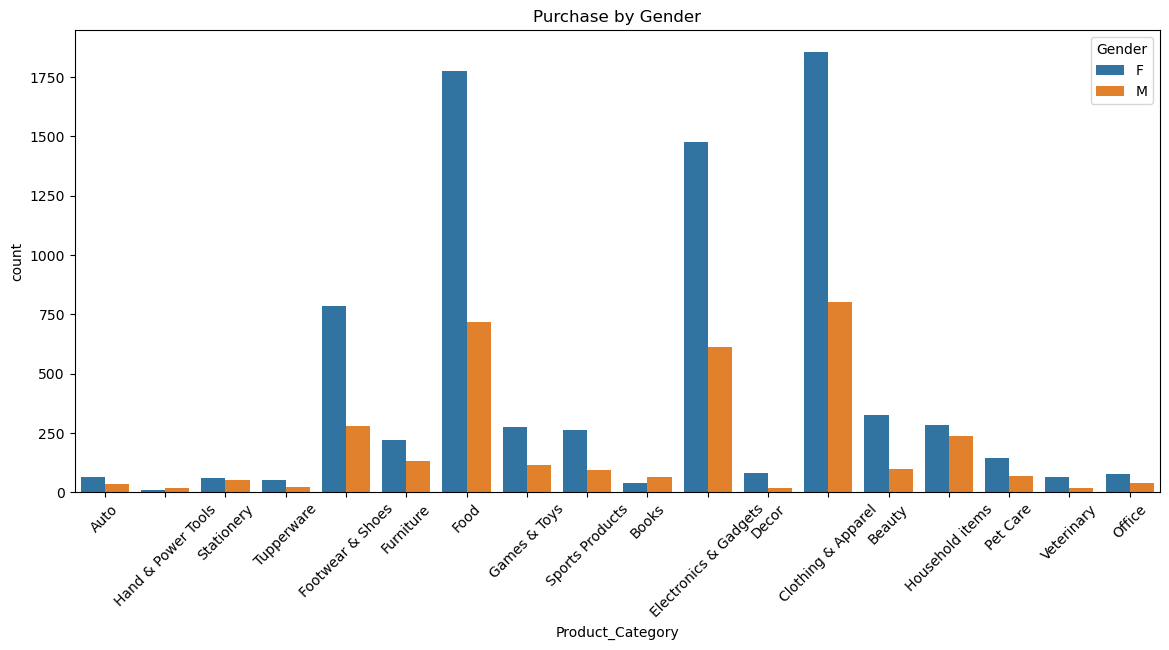

In [6]:
fig, ax=plt.subplots(figsize=(14,6))
pd.crosstab(df['Product_Category'], df["Gender"])

sns.countplot(data=df, x='Product_Category', hue="Gender", ax=ax)
plt.xticks(rotation=45)
plt.title("Purchase by Gender");

### Where do most of your customers work?

<Axes: xlabel='Occupation'>

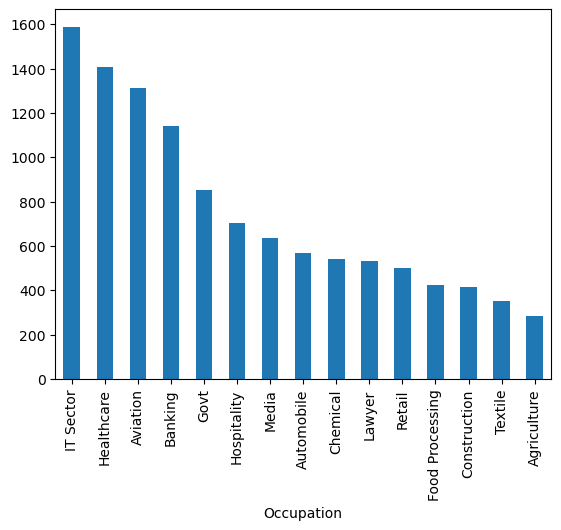

In [109]:
df.value_counts("Occupation").sort_values(ascending=False).plot(kind="bar")

Most of the customers buy clothing and Apparel, Food, Eloctronics and Gadgets, and footwear and Shoes. It seems like hand and power Tools is the least selling of them all.

### Looking at the sales by Zone

In [19]:
df.Zone.unique()

array(['Western', 'Southern', 'Central', 'Northern', 'Eastern'],
      dtype=object)

Zone
Southern    9879.936495
Central     9697.214941
Western     9416.132444
Eastern     8660.670357
Northern    8467.414765
Name: Amount, dtype: float64


<Axes: xlabel='Zone'>

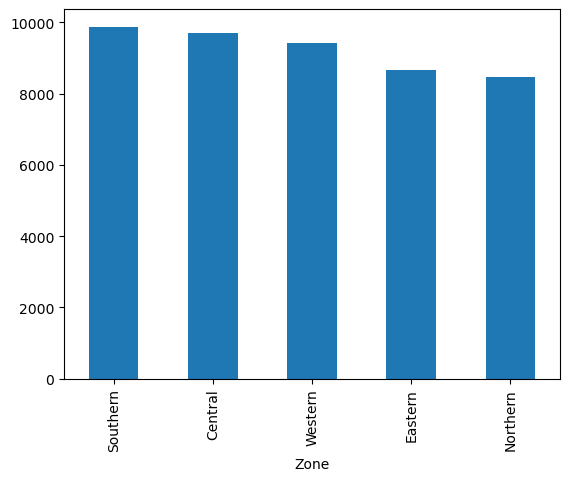

In [27]:
sales_zone=df.groupby(["Zone"])["Amount"].mean().sort_values(ascending=False)
print(sales_zone)
sales_zone.plot(kind="bar")
# sns.barplot(data=df, x="Zone", y="Amount")

In [30]:
df_north=df[df["Zone"]=='Northern']

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.0
38,1002520,Mike,P00310342,M,55+,72,1,Himachal Pradesh,Northern,Media,Auto,4,23267.0
51,1003745,Shivani,P00220042,M,26-35,29,0,Haryana,Northern,IT Sector,Stationery,2,21563.0
80,1000461,Connell,P00142942,M,51-55,52,1,Himachal Pradesh,Northern,Healthcare,Stationery,2,20965.0
139,1000838,Divyeshkumar,P00363542,M,51-55,53,1,Rajasthan,Northern,Hospitality,Footwear & Shoes,2,20796.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,1005256,Grant,P00253142,F,26-35,33,1,Haryana,Northern,Govt,Pet Care,4,686.0
11219,1004268,Rosenblatt,P00302942,M,46-50,48,0,Himachal Pradesh,Northern,Govt,Office,4,580.0
11236,1002168,Hightower,P00145842,M,0-17,17,1,Himachal Pradesh,Northern,Agriculture,Office,4,560.0
11237,1000687,Neola,P00181542,M,26-35,29,1,Haryana,Northern,Media,Office,2,557.0


In [31]:
# df.pivate_table(index="Zone", colum"State", )